In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_plot_full_trajectories-motivate_skew'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/data/


In [2]:
## Load data

true_df = pd.read_csv('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/out/pb_e2_dataset_multi/obs_reads_pivot_extraj_double.csv')
display(true_df)

true_df.to_csv(results_dir + f'double_ground_truth.csv')

,Nucleotide and position,0,1,2,3,4,5,6,7,8,9,10,11
0,- 0,0.95,0.910851,0.837041,0.716301,0.559253,0.383524,0.233757,0.13734,0.075418,0.037859,0.026353,0.025626
1,- 1,0.95,0.910851,0.837041,0.716301,0.559253,0.383524,0.233757,0.13734,0.075418,0.037859,0.026353,0.025626
2,a 0,0.05,0.089149,0.162959,0.283699,0.440747,0.616476,0.766243,0.86266,0.924582,0.962141,0.973647,0.974374
3,b 1,0.05,0.089149,0.162959,0.283699,0.440747,0.616476,0.766243,0.86266,0.924582,0.962141,0.973647,0.974374


## any

In [57]:
def plot_inferred_trajectories(modelexp = 'extraj', model_id = 'double_beta0', out_fn = '', title = ''):
    prj_dir = '/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/out/_fitness_from_reads_pt_multi/'
    df = pd.read_csv(f'{prj_dir}/{modelexp}/model_{model_id}/_final_genotype_matrix.csv', index_col = 0)
    
    df['Abbrev genotype'] = df.index
    df = df.reset_index(drop = True)
    csv_out_fn = '.'.join(out_fn.split('.')[:-1]) + '.csv'
    df.to_csv(f'{csv_out_fn}')
    
    
    melt_df = df.melt(
        id_vars = 'Abbrev genotype',
        var_name = 'Time',
        value_name = 'Frequency (%)',
    )
    melt_df['Frequency (%)'] *= 100
    
    melt_df['Time'] = melt_df['Time'].astype(int)
    melt_df = melt_df.sort_values(by = 'Time', ascending = True)
    
    # Jitter
    melt_df['Frequency (%)'] += np.random.normal(loc = 0, scale = 0.5, size = len(melt_df))
    print(set(melt_df['Abbrev genotype']))
    
    #
    import matplotlib
    matplotlib.rc('font', family = 'Arial', size = 15)
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
    #
    
    fig, ax = plt.subplots(figsize = (6, 5))

    palette = {
        '--': '#ec4339',
        'a-': '#efb920',
        '-b': '#7cb82f',
        'ab': '#00a0dc',
    }
    
    sns.lineplot(
        x = 'Time',
        y = 'Frequency (%)',
        hue = 'Abbrev genotype',
        palette = palette,
        ci = None,
        data = melt_df,
#         linewidth = 1.5,
        linewidth = 2,
        marker = 'o',
        ax = ax,
    )
    ax.get_legend().remove()
    plt.grid(alpha = 0.2)
    plt.xlabel('Time (h)')
    plt.ylabel('Predicted fraction of sequenced reads (%)')
    
    if title != '':
        plt.title(title)
    
    plt.tight_layout()

    ##

    sns.despine(trim = False)
    ax.tick_params(length = 4.5, color = 'black', width = 1.5)
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('black')

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    print(f'Saving to {out_fn} ...')
    plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

    plt.show()
    plt.close()
    ##
    
    return


{'ab', '-b', '--', 'a-'}
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_plot_full_trajectories-motivate_skew/double_beta0.pdf ...


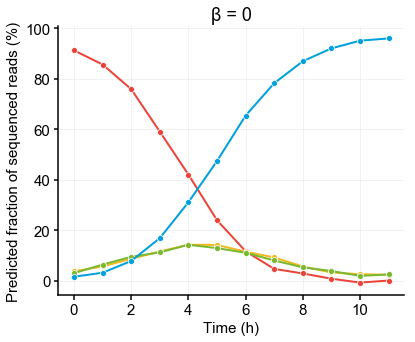

In [58]:
plot_inferred_trajectories(
    modelexp = 'extraj', 
    model_id = 'double_beta0', 
    out_fn = results_dir + 'double_beta0.pdf', 
    title = 'β = 0',
)

{'ab', '-b', '--', 'a-'}
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_plot_full_trajectories-motivate_skew/double_beta0.001.pdf ...


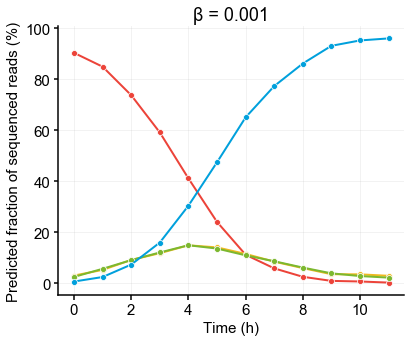

In [50]:
plot_inferred_trajectories(
    modelexp = 'extraj', 
    model_id = 'double_beta0.001', 
    out_fn = results_dir + 'double_beta0.001.pdf', 
    title = 'β = 0.001',
)

{'ab', '-b', '--', 'a-'}
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_plot_full_trajectories-motivate_skew/double_beta0.1.pdf ...


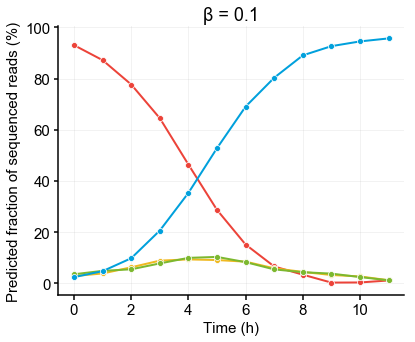

In [51]:
plot_inferred_trajectories(
    modelexp = 'extraj', 
    model_id = 'double_beta0.1', 
    out_fn = results_dir + 'double_beta0.1.pdf', 
    title = 'β = 0.1',
)

{'ab', '-b', '--', 'a-'}
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_plot_full_trajectories-motivate_skew/double_beta1.pdf ...


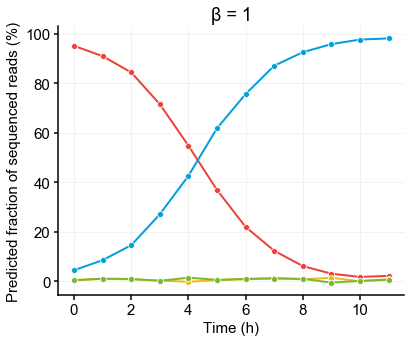

In [52]:
plot_inferred_trajectories(
    modelexp = 'extraj', 
    model_id = 'double_beta1', 
    out_fn = results_dir + 'double_beta1.pdf', 
    title = 'β = 1',
)